# 타이타닉 데이터 분류모델 만들기
- 캐글에 업로드
- 전처리 데이터와 전처리 하지 않은 데이터의 결과 비교
- 5가지 모델 알고리즘을 이용해서 결과를 확인

In [2]:
#1. 데이터로드

In [7]:
titanic_df = pd.read_csv("datas/train.csv")
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
#2. 데이터 전처리

In [8]:
# 전처리 1 : 수치형 데이터 컬럼만 사용

In [10]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
columns = ["Pclass","Age","SibSp","Parch","Fare","Survived"]
titanic_1 = titanic_df[columns]
titanic_1.dropna(inplace=True)
titanic_1.reset_index(drop=True, inplace=True)
titanic_1.tail()

<ipython-input-15-f2ce4376cde1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_1.dropna(inplace=True)


,Pclass,Age,SibSp,Parch,Fare,Survived
709,3,39.0,0,5,29.125,0
710,2,27.0,0,0,13.000,0
711,1,19.0,0,0,30.000,1
712,1,26.0,0,0,30.000,1
713,3,32.0,0,0,7.750,0


In [16]:
titanic_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 33.6 KB


In [9]:
# 전처리 2 : 범주형 데이터를 더미 변수화 해서 사용

In [31]:
columns = ["Pclass","Age","SibSp","Parch","Fare","Survived","Sex","Embarked"]
titanic_2 = titanic_df[columns]
#더미변수화
dummy_1 = pd.get_dummies(titanic_2["Sex"])
dummy_2 = pd.get_dummies(titanic_2["Embarked"])
# 더미변수화 한 데이터 프레임 합치기
titanic_2 = pd.concat([titanic_2,dummy_1,dummy_2], axis =1)
# NaN 데이터가 있는 row 삭제
titanic_2.dropna(inplace=True)
#reset index
titanic_2.reset_index(drop=True,inplace=True)
#범주형 데이터가 있는 sex , embarked 컬럼 삭제
titanic_2.drop(columns=["Sex","Embarked"],inplace=True)
titanic_2

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,0,1,0,0,1,0
708,2,27.0,0,0,13.0000,0,0,1,0,0,1
709,1,19.0,0,0,30.0000,1,1,0,0,0,1
710,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [30]:
titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Age       712 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   Survived  712 non-null    int64  
 6   female    712 non-null    uint8  
 7   male      712 non-null    uint8  
 8   C         712 non-null    uint8  
 9   Q         712 non-null    uint8  
 10  S         712 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 42.4 KB


In [4]:
#3. 데이터셋 분리

In [78]:
# df_x = titanic_1.drop(columns=["Survived"])
# df_y = titanic_1["Survived"]
df_x = titanic_2.drop(columns=["Survived"])
df_y = titanic_2["Survived"]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,test_size=0.2,random_state=1)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((569, 10), (143, 10), (569,), (143,))

In [5]:
#4. 5가지 모델 학습

In [37]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_model = DecisionTreeClassifier(random_state=0).fit(train_x,train_y)
dt_acc = np.round(dt_model.score(test_x,test_y) * 100,2)
# pred_y = dt_model.predict(test_x)
# pred_y, test_y
dt_acc

78.32

In [44]:
#RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
M,T = 0,0
# for i in range(1,100):
#     rf_model = RandomForestClassifier(n_estimators=i, random_state=0).fit(train_x,train_y)
#     rf_acc = np.round(rf_model.score(test_x,test_y) * 100,2)
#     if rf_acc > M:
#         M = rf_acc
#         T = i
rf_model = RandomForestClassifier(n_estimators=6, random_state=0).fit(train_x,train_y)
rf_acc = np.round(rf_model.score(test_x,test_y) * 100,2)
print(M,T)

82.52 6


In [60]:
# 3. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [83]:
gnp_model = GaussianNB().fit(train_x,train_y)
gnp_acc = np.round(gnp_model.score(test_x,test_y) * 100,2)
gnp_acc

76.22

In [65]:
# 4. logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr_model = LogisticRegression().fit(train_x,train_y)
lr_acc = np.round(lr_model.score(test_x,test_y) * 100,2)
lr_acc

/Users/song-kang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


74.83

In [70]:
# 5. support vector machine

In [72]:
from sklearn.svm import SVC


In [85]:
sv_model = SVC().fit(train_x,train_y)
sv_acc = np.round(sv_model.score(test_x,test_y) * 100,2)
sv_acc

64.34

In [86]:
# 전처리 1 결과
dt_acc, rf_acc, gnp_acc, lr_acc, sv_acc

(78.32, 76.92, 76.22, 74.83, 64.34)

In [ ]:
#5. 제출할 데이터 파일 만들기

In [88]:
RandomForestClassifier(n_estimators=6, random_state=0).fit(train_x,train_y)

RandomForestClassifier(n_estimators=6, random_state=0)

In [90]:
# 제출할 파일 불러오기
submission_df = pd.read_csv("datas/gender_submission.csv")
submission_df.tail(2)

,PassengerId,Survived
416,1308,0
417,1309,0


In [92]:
# 테스트 파일 불러오기
test_df = pd.read_csv("datas/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [93]:
# 테스트파일 전처리
columns = ["Pclass","Age","SibSp","Parch","Fare","Sex","Embarked"]
test_df = test_df[columns]
#더미변수화
dummy_1 = pd.get_dummies(test_df["Sex"])
dummy_2 = pd.get_dummies(test_df["Embarked"])
# 더미변수화 한 데이터 프레임 합치기
test_df = pd.concat([test_df,dummy_1,dummy_2], axis =1)
# NaN 데이터가 있는 row 삭제
# test_df.dropna(inplace=True)
#reset index
test_df.reset_index(drop=True,inplace=True)
#범주형 데이터가 있는 sex , embarked 컬럼 삭제
test_df.drop(columns=["Sex","Embarked"],inplace=True)
test_df

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,1,0,0,1


In [94]:
import missingno as msno

<AxesSubplot:>

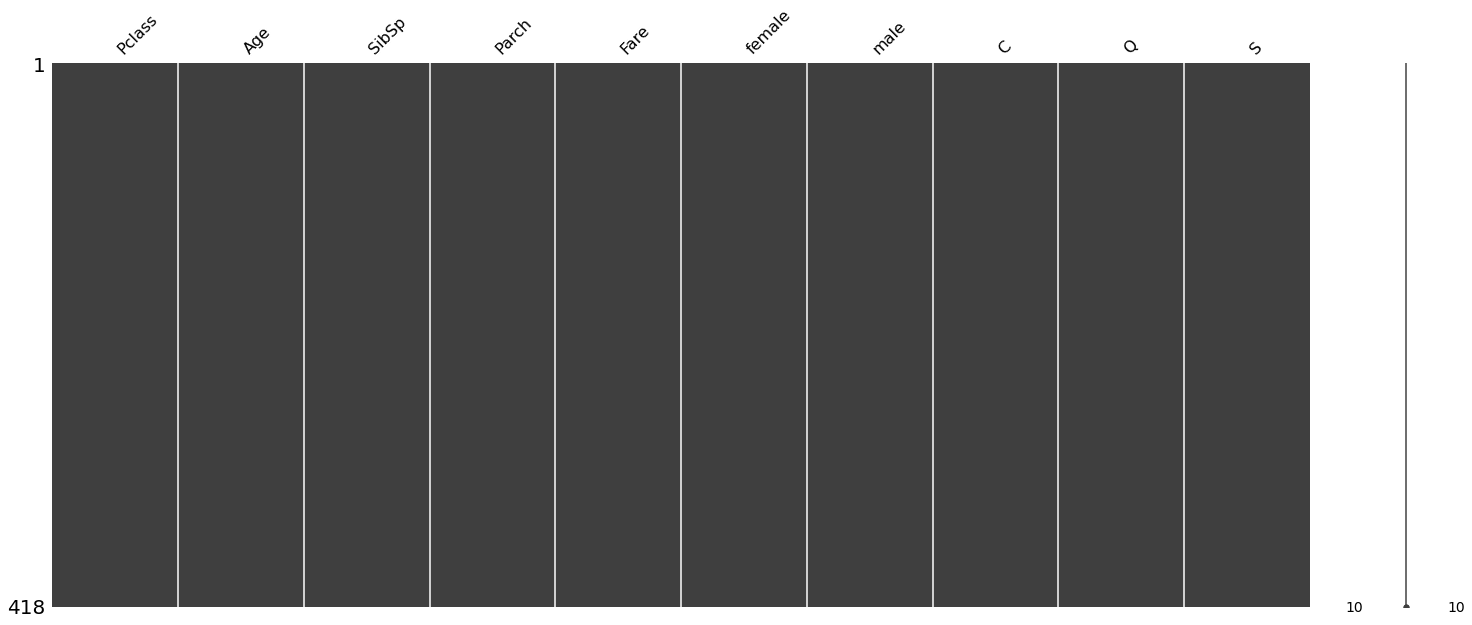

In [113]:
msno.matrix(test_df)

In [102]:
%matplotlib inline
%config inlineBackend.figure_formats = {'png','retina'}

/Users/song-kang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


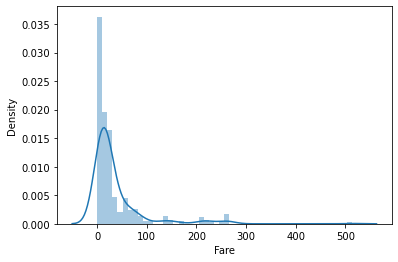

In [103]:
sns.distplot(test_df.Fare)
plt.show()

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# Fare의 NaN데이터를 중앙값으로 대체
np.median(test_df.Fare.dropna())
test_df["Fare"][test_df.Fare.isnull()] = np.median(test_df.Fare.dropna())

<ipython-input-107-70f8531cd8b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Fare"][test_df.Fare.isnull()] = np.median(test_df.Fare.dropna())


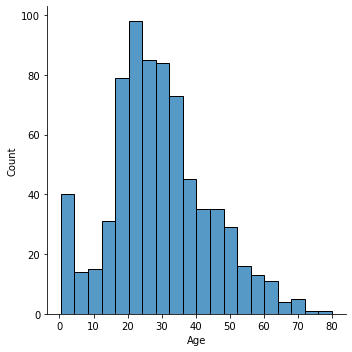

In [111]:
sns.displot(titanic_df.Age)
plt.show()

In [112]:
test_df["Age"][test_df.Age.isnull()] = np.median(test_df.Age.dropna())

<ipython-input-112-23ca0488b2ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Age"][test_df.Age.isnull()] = np.median(test_df.Age.dropna())


In [116]:
pred_y = rf_model.predict(test_df)
pred_y[:5],len(pred_y)

(array([0, 0, 0, 1, 0]), 418)

In [117]:
submission_df["Survived"] = pred_y

In [118]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [119]:
submission_df.to_csv("datas/submission_pred.csv",index=False)

In [120]:
%ls datas

__pycache__/           preprocessing.csv      test.csv
gender_submission.csv  seoul.csv              train.csv
makedata.py            submission_pred.csv
